In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

#sunnah
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
df = pd.read_csv("linkdin_Job_data.csv")

In [ ]:
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

Deskripsi Dataset
- job_ID: Identifikasi unik untuk setiap posting pekerjaan.
- job:Judul pekerjaan yang diposting.
- location: Lokasi pekerjaan yang diposting.
- company_id: Identifikasi unik perusahaan yang menawarkan pekerjaan.
- company_name: Nama perusahaan yang menawarkan pekerjaan.
- work_type:Jenis pekerjaan yang ditawarkan (misalnya,full-time, part-time, dll.).
- full_time_remote: Menunjukkan apakah pekerjaan tersebutfull-time remote.
- no_of_employ:Jumlah karyawan di perusahaan yang menawarkan pekerjaan.
- no_of_application:Jumlah lamaran yang diterima untuk pekerjaan tersebut.
- posted_day_ago:Jumlah hari yang lalu sejak pekerjaan diposting.
- alumni: Menunjukkan apakah posting pekerjaan untuk alumni dari organisasitertentu.
- Hiring_person: Nama orang yang bertanggung jawab untuk merekrut pekerjaan tersebut.
- linkedin_followers:Jumlah pengikut LinkedIn dari orang yang merekrut.
- hiring_person_link: Tautan ke profil LinkedIn dari orang yang merekrut.
- job_details: Informasi rincitentang pekerjaan,termasuk tanggung jawab dan persyaratan.


1. Identifikasi kolom dengan nilai yang hilang dan hitung persentase data yang hilang dengan benar. (MV)

In [ ]:
df.head(2)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN


In [ ]:
nilai_hilang = df.isnull().sum()
persentase_hilang = (nilai_hilang / len(df)) * 100

ringkasan_data_hilang = pd.DataFrame({
    'Nilai yang hilang': nilai_hilang,
    'Persentase': persentase_hilang
})

In [ ]:
ringkasan_data_hilang = ringkasan_data_hilang[ringkasan_data_hilang['Nilai yang hilang'] > 0]
ringkasan_data_hilang


,Nilai yang hilang,Persentase
job,33,0.416299
location,33,0.416299
company_id,7927,100.000000
company_name,35,0.441529
work_type,191,2.409487
full_time_remote,79,0.996594
no_of_employ,324,4.087297
no_of_application,40,0.504605
posted_day_ago,7,0.088306
alumni,3069,38.715782


2. Mengonversi`no_of_employ` ke integer dan menangani nilai non-numerik dengan benar. (DT)

In [ ]:
df.head(3)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN


In [ ]:
def pisahkan_data(value):
    if pd.isna(value):
        return pd.Series([None, None])

    numbers = re.findall(r'\d+', value.replace(',', ''))

    if "10,001+" in value or "10001+" in value:
        return pd.Series([1, 10001])

    if len(numbers) == 1:
        return pd.Series([1, int(numbers[0])])

    if len(numbers) == 2:
        return pd.Series([int(numbers[0]), int(numbers[1])])

    return pd.Series([None, None])


In [ ]:
df[['min_no_of_employ', 'maks_no_of_employ']] = df['no_of_employ'].apply(pisahkan_data)
df['min_no_of_employ'] = pd.to_numeric(df['min_no_of_employ'])
df['maks_no_of_employ'] = pd.to_numeric(df['maks_no_of_employ'])


In [ ]:
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1,min_no_of_employ,maks_no_of_employ
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN,1001.0,5000.0
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN,1.0,10.0
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN,1.0,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
 16  min_no

3. Deteksi dan hapus data duplikat berdasarkan `job_ID`(DD)

In [ ]:
df.duplicated(subset=["job_ID"]).sum()


np.int64(2084)

In [ ]:
df = df.drop_duplicates(keep="first",subset=["job_ID"])

In [ ]:
df.duplicated(subset=["job_ID"]).sum()

np.int64(0)

4. Standarisasi kolom `location` agar nama kota konsisten. (DS)

In [ ]:
df.head(20)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1,min_no_of_employ,maks_no_of_employ
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN,1001.0,5000.0
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN,1.0,10.0
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN,1.0,10.0
5,3472504479,Data Analyst,"Gurugram, Haryana, India",NaN,airtel,On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10 hours,132 company alumni,NaN,"972,657 followers",NaN,About the job The ideal candidate will use the...,NaN,1.0,10001.0
6,3471658510,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,546 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0
7,3472808738,Shopify Developer,"Delhi, India",NaN,Digital Impressions,On-site,Full-time,51-200 employees,2,7 hours,1 company alumni,Rashmi Aggarwal,"1,045 followers",https://www.linkedin.com/in/aggarwal-rashmi,About the job The ideal candidate will be resp...,NaN,51.0,200.0
8,3475061559,Database Developer,"Gurugram, Haryana, India",NaN,Kline & Company,Hybrid,Full-time,201-500 employees,7,25 minutes,NaN,Duncan Lawie,"30,319 followers",https://www.linkedin.com/in/duncan-lawie,About the job Are you an experienced Microsoft...,NaN,201.0,500.0
9,3473336242,Shopify Developer,"Gurugram, Haryana, India",NaN,ADesignGuy,Hybrid,NaN,NaN,minutes,9 minutes,NaN,NaN,"2,163 followers",NaN,About the job Job Title: Shopify Developer (In...,NaN,NaN,NaN


In [ ]:
def memisahkan_location(location):
    if pd.isna(location) or not isinstance(location, str):
        return 'Unknown', 'Unknown', 'Unknown'

    parts = location.split(', ')

    if len(parts) == 3:
        return parts[0], parts[1], parts[2]
    elif len(parts) == 2:
        return 'Unknown', parts[0], parts[1]
    elif len(parts) == 1:
        return 'Unknown', 'Unknown', parts[0]
    else:
        return 'Unknown', 'Unknown', 'Unknown'


In [ ]:
df[['kota', 'provinsi', 'negara']] = df['location'].apply(memisahkan_location).apply(pd.Series)

In [ ]:
df[['location', 'kota', 'provinsi', 'negara']].head(5)


,location,kota,provinsi,negara
0,"Delhi, Delhi, India",Delhi,Delhi,India
1,"New Delhi, Delhi, India",New Delhi,Delhi,India
2,Greater Bengaluru Area,Unknown,Unknown,Greater Bengaluru Area
3,"Gurugram, Haryana, India",Gurugram,Haryana,India
4,"Mohali district, Punjab, India",Mohali district,Punjab,India


5. Identifikasi outlier pada `no_of_application` menggunakan metode IQR dan berikan analisis singkat. (DO)

In [ ]:
df

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1,min_no_of_employ,maks_no_of_employ,kota,provinsi,negara
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0,Delhi,Delhi,India
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,1001.0,5000.0,New Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN,1001.0,5000.0,Unknown,Unknown,Greater Bengaluru Area
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN,1.0,10.0,Gurugram,Haryana,India
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN,1.0,10.0,Mohali district,Punjab,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,NaN,5001.0,10000.0,Kochi,Kerala,India
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,NaN,1001.0,5000.0,Gurugram,Haryana,India
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,NaN,1.0,10001.0,Hyderabad,Telangana,India
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,NaN,1001.0,5000.0,Bengaluru,Karnataka,India


In [ ]:
df.describe()

,job_ID,company_id,Column1,min_no_of_employ,maks_no_of_employ
count,5.843000e+03,0.0,0.0,5614.000000,5614.000000
mean,3.467007e+09,NaN,NaN,533.616673,3778.768614
std,6.206108e+07,NaN,NaN,827.380161,3628.152223
min,1.419216e+08,NaN,NaN,1.000000,10.000000
25%,3.467368e+09,NaN,NaN,11.000000,200.000000
50%,3.472507e+09,NaN,NaN,201.000000,5000.000000
75%,3.476289e+09,NaN,NaN,1001.000000,5000.000000
max,3.477823e+09,NaN,NaN,5001.000000,10001.000000


<Axes: xlabel='no_of_application'>

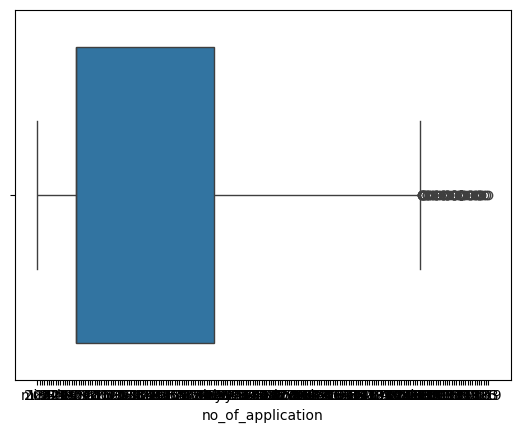

In [ ]:
sns.boxplot(
    data=df,
    x="no_of_application"
)

In [ ]:
df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')

In [ ]:
q1 = df['no_of_application'].quantile(0.25)
q3 = df['no_of_application'].quantile(0.75)
iqr = q3 - q3

batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

In [ ]:
q1

np.float64(6.0)

In [ ]:
q3

np.float64(78.0)

In [ ]:
tanpa_outlier = (df['no_of_application'] > batas_bawah) & (df['no_of_application'] < batas_atas)
df = df[tanpa_outlier]

<Axes: xlabel='no_of_application'>

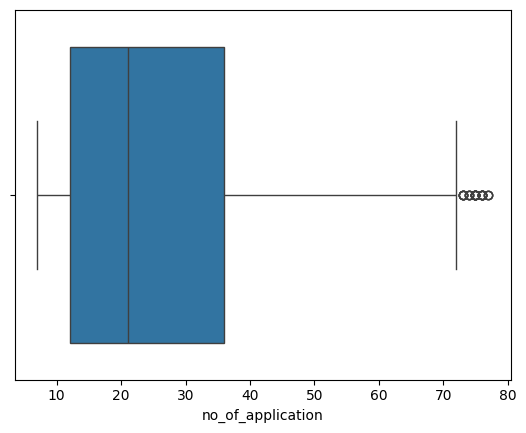

In [ ]:
sns.boxplot(
    data=df,
    x="no_of_application"
)

Hasil analisis
- sebelumnya, sekitar 75% data berada di bawah 78 aplikasi, tapi maksimum mencapai 200.

Menurut saya outlier ini masih bisa dianggap masuk akal dalam konteks perekrutan
- Pekerjaan populer atau di perusahaan terkenal bisa menarik ratusan lamaran.
- Beberapa pekerjaan mungkin memiliki periode aplikasi lebih lama atau dipromosikan lebih luas.

Namun, nilai maksimum 200 yang berulang bisa menandakan batasan sistem atau kebijakan perusahaan dalam melacak pelamar dan distribusi yang sangat miring bisa mempengaruhi analisis statistik standar.

Sebelum melanjutkan analisis lebih jauh, menurut saya sangat penting untuk memahami arti sebenarnya dari nilai 200 ini.  
Jika ini memang merupakan batasan sistem atau kode untuk "200 atau lebih", maka data ini mungkin masih valid tetapi memerlukan pendekatan analisis yang berbeda.  
Jika outlier dianggap valid (misalnya, memang ada pekerjaan yang sangat populer), pertimbangkan untuk berkonsultasi kepada mentor.  
Jika ada kecurigaan bahwa nilai 200 adalah batasan sistem, diskusikan dengan tim pengumpul data untuk klarifikasi.  


